Advanced Statistical Analysis Table:

+----------+------------------+-----------------+-------------------+-------------------+-----------------+------------------------------------------+--------------------------+--------------------+-------------------+-----------------+--------------------+----------------+--------------------+---------------+------------------+---------------------+--------------------------+---------------------------+--------------------+
| Metric   |               ID |             Age |   Flight Distance |   Departure Delay |   Arrival Delay |   Departure and Arrival Time Convenience |   Ease of Online Booking |   Check-in Service |   Online Boarding |   Gate Location |   On-board Service |   Seat Comfort |   Leg Room Service |   Cleanliness |   Food and Drink |   In-flight Service |   In-flight Wifi Service |   In-flight Entertainment |   Baggage Handling |
+==========+==================+=================+===================+===================+===============

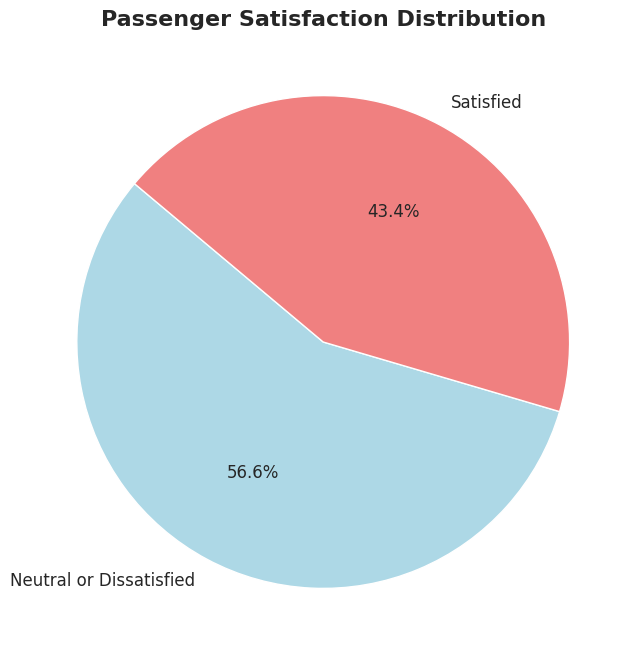

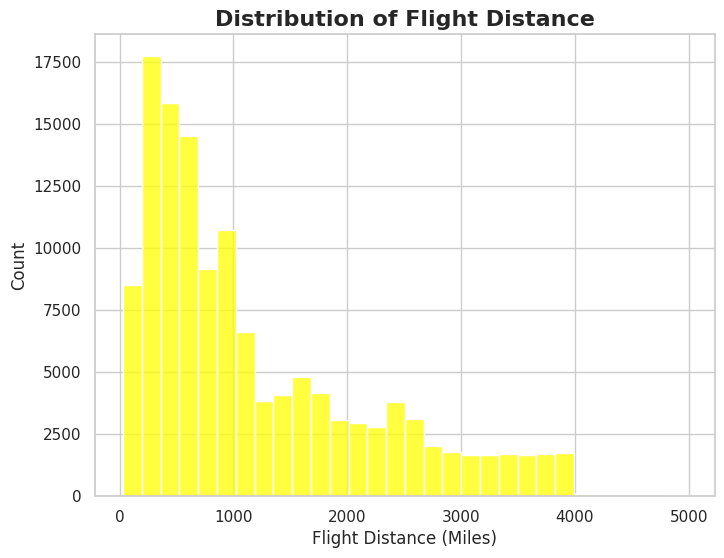

<ipython-input-9-ec5625a73012>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


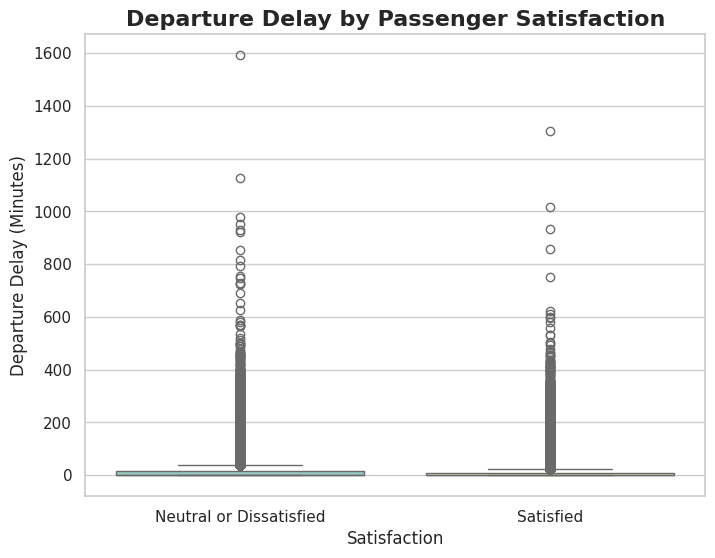

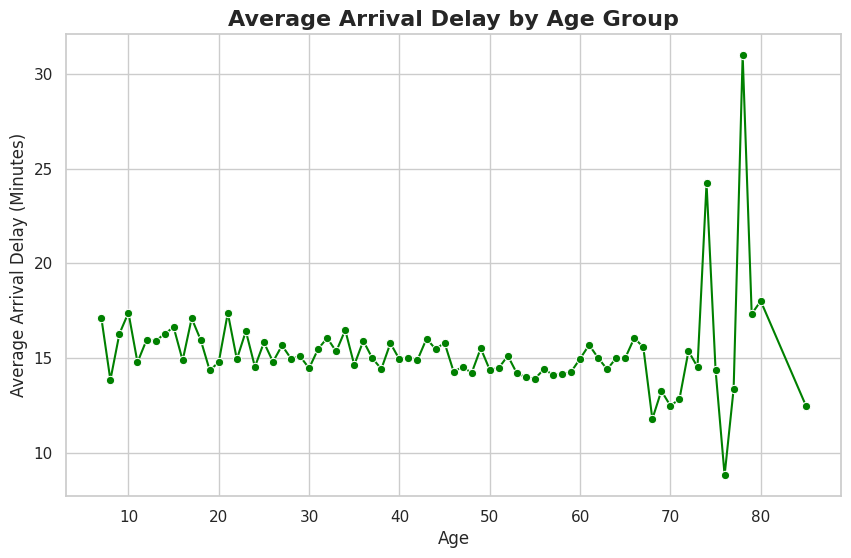

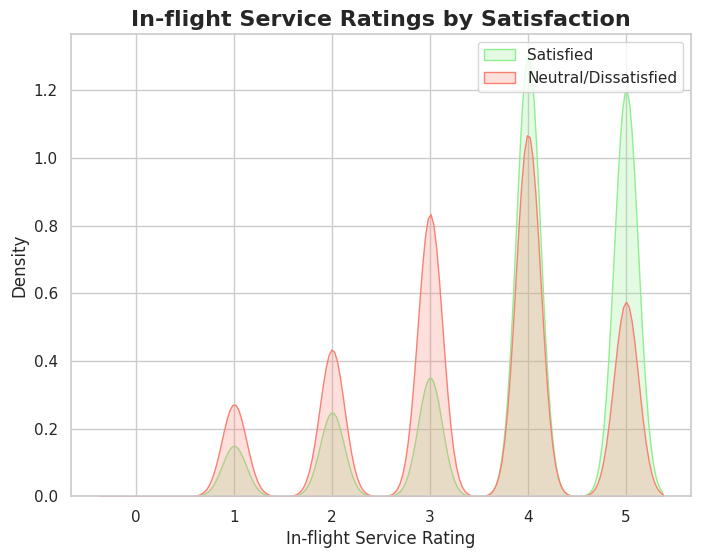


Analysis Complete: This report provides:
- Comprehensive statistical analysis.
- Visual insights using pie chart, histogram, box plot, line chart, and density plot.


In [9]:
# Import necessary libraries
import pandas as pd
from scipy.stats import skew, kurtosis
from tabulate import tabulate

# Load the dataset
data_path = "airline_passenger_satisfaction.csv"
airline_data = pd.read_csv(data_path)

# ------------------------------------------------------
# Statistical Analysis Table
# ------------------------------------------------------

# Select numeric columns for statistical analysis
numeric_cols = airline_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate advanced statistics
stats_data = {
    "Metric": ["Count", "Mean", "Median", "Std Dev", "Variance", "Min", "Max", "Skewness", "Kurtosis"]
}
for col in numeric_cols:
    stats_data[col] = [
        airline_data[col].count(),
        airline_data[col].mean(),
        airline_data[col].median(),
        airline_data[col].std(),
        airline_data[col].var(),
        airline_data[col].min(),
        airline_data[col].max(),
        skew(airline_data[col]),
        kurtosis(airline_data[col])
    ]

# Convert to DataFrame
stats_df = pd.DataFrame(stats_data)

# Display the table using tabulate
print("Advanced Statistical Analysis Table:\n")
print(tabulate(stats_df, headers="keys", tablefmt="grid", showindex=False))

# Export the table to a CSV file (optional)
stats_df.to_csv("advanced_statistical_analysis.csv", index=False)

# ------------------------------------------------------
# Visualization 1: Pie Chart for Satisfaction Distribution
# ------------------------------------------------------
plt.figure(figsize=(8, 8))
satisfaction_counts = airline_data['Satisfaction'].value_counts()
plt.pie(
    satisfaction_counts,
    labels=satisfaction_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightblue', 'lightcoral'],
    textprops={'fontsize': 12}
)
plt.title('Passenger Satisfaction Distribution', fontsize=16, fontweight='bold')
plt.show()

# ------------------------------------------------------
# Visualization 2: Histogram for Flight Distance
# ------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.histplot(
    data=airline_data,
    x='Flight Distance',
    kde=False,
    bins=30,
    color='yellow'
)
plt.title('Distribution of Flight Distance', fontsize=16, fontweight='bold')
plt.xlabel('Flight Distance (Miles)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# ------------------------------------------------------
# Visualization 3: Box Plot for Departure Delay vs Satisfaction
# ------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=airline_data,
    x='Satisfaction',
    y='Departure Delay',
    palette='Set3'
)
plt.title('Departure Delay by Passenger Satisfaction', fontsize=16, fontweight='bold')
plt.xlabel('Satisfaction', fontsize=12)
plt.ylabel('Departure Delay (Minutes)', fontsize=12)
plt.show()

# ------------------------------------------------------
# Visualization 4: Line Chart for Arrival Delay by Age Group
# ------------------------------------------------------
# Group by Age and calculate mean Arrival Delay
age_delay = airline_data.groupby('Age')['Arrival Delay'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=age_delay,
    x='Age',
    y='Arrival Delay',
    color='green',
    marker='o'
)
plt.title('Average Arrival Delay by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Arrival Delay (Minutes)', fontsize=12)
plt.show()

# ------------------------------------------------------
# Visualization 5: Density Plot for In-flight Service Ratings
# ------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=airline_data[airline_data['Satisfaction'] == 'Satisfied'],
    x='In-flight Service',
    fill=True,
    color='lightgreen',
    label='Satisfied'
)
sns.kdeplot(
    data=airline_data[airline_data['Satisfaction'] != 'Satisfied'],
    x='In-flight Service',
    fill=True,
    color='salmon',
    label='Neutral/Dissatisfied'
)
plt.title('In-flight Service Ratings by Satisfaction', fontsize=16, fontweight='bold')
plt.xlabel('In-flight Service Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

# ------------------------------------------------------
# Final Summary
# ------------------------------------------------------
print("\nAnalysis Complete: This report provides:")
print("- Comprehensive statistical analysis.")
print("- Visual insights using pie chart, histogram, box plot, line chart, and density plot.")